# Level 5
This notebooks explains the process of obtaining the prior mean and variance estimates for Level 5. It also shows how to generate the figures included in the manuscript.

Text(0.5, 1.0, 'ABC123 vs $\\mathrm{ABC123}^{123}$')

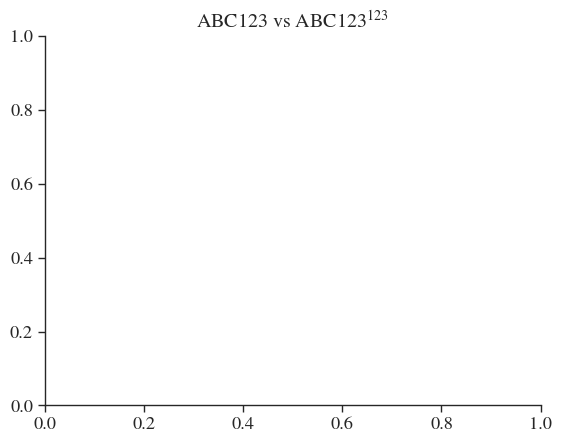

In [ ]:
# Imports
import numpy as np
from bayesian_agent import BayesianReplica
from estimate_agent import estimate_agent, find_mu
import pandas as pd
from concat_mean import concat_mean
from data_gen_meanPrior import data_gen_meanPrior
from data_gen_varPrior import data_gen_varPrior
from concat_var_mle import concat_var_mle
import matplotlib.pyplot as plt
import os
from scipy import stats

# Imports for ease of visualization
import warnings
import matplotlib as mpl
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch
import seaborn as sns

# Parameters for plotting
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="colorblind", font_scale=1.5, rc=custom_params, context="paper")

# Source - https://stackoverflow.com/a
# Posted by lindyblackburn, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-17, License - CC BY-SA 3.0

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
data_dir = "../data"
experiment_name = "level_5"
source_of_data = "website_training_output"

folder_exp_data = os.path.join(
    data_dir,
    experiment_name,
    source_of_data,
)

In [3]:
# Generate data for mean prior estimation
# We have a set of files from experiments with different number of trials
# We will estimate the mean prior from each of these files and generate new data files

# Currently not using this

#data_gen_meanPrior()

file_list = ['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '58', '59', '60', '61', '62', '63']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# 0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000
#These are the files for mu

for i in range(len(file_list)):
    file = f'{folder_exp_data}/experiment_results ({file_list[i]}).csv'
    #mean = find_mu(file)
    # data_gen_varPrior(mean, out_path=f'var_mean_exp5_data_{file_id}.csv')

In [4]:
file_list = ['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '58', '59', '60', '61', '62', '63']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# Rename files into readable names
for i in range(len(file_list)):
    # Open experiment results file
    file = f'{folder_exp_data}/experiment_results ({file_list[i]}).csv'
    # Read it as pandas
    tmp = pd.read_csv(file)
    # Rename it and save with readable name
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_mu_{trials[i]}_trials.csv')
    
file_list_2 = ['42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']
file_list_2_temp = ['64', '65', '66', '67', '68', '69']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# Rename files into readable names
for i in range(len(file_list_2)):
    # Open experiment results file
    file = f'{folder_exp_data}/experiment_results ({file_list_2[i]}).csv'
    # Read it as pandas
    tmp = pd.read_csv(file)
    # Rename it and save with readable name
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_variance_{trials[i]}_trials.csv')
    
for i in range(len(file_list_2_temp)):
    file_id = file_list_2_temp[i]

    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    tmp = pd.read_csv(file)
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_variance_{trials[16+i]}_trials.csv')


In [5]:
mu_list = []
sigma_list = []
internal_std_list = []

for i in range(len(trials)):
    # Experiments that find mu
    file_mean = f'{folder_exp_data}/experiment_results/experiment_results_mu_{trials[i]}_trials.csv'
    # Get the mean estimate
    mu_environment = find_mu(file_mean)
    
    # Open experiment results file to get variance
    file_experiments = f'{folder_exp_data}/experiment_results/experiment_results_variance_{trials[i]}_trials.csv'
    # Group and sort values
    data = concat_var_mle(file_experiments)
    
    # Estimate agent  parameters
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mu_environment)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)

In [6]:
#data_gen_meanPrior()

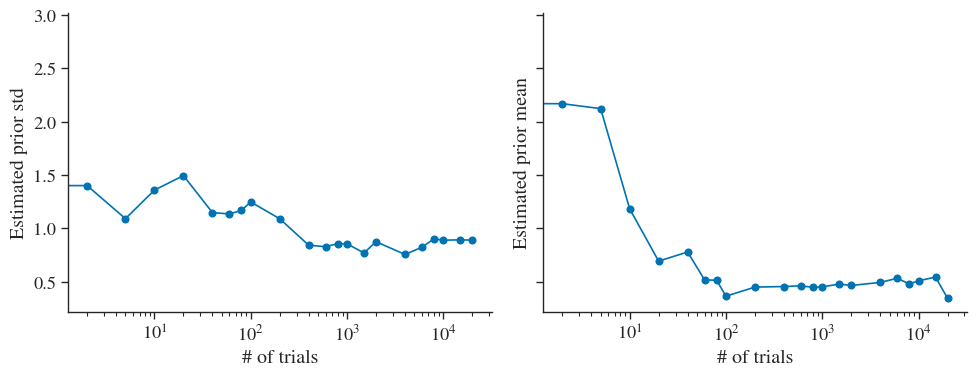

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
axes[0].plot(trials, sigma_list, marker='o')
axes[0].set_xscale('log')
axes[0].set_xlabel('# of trials')
axes[0].set_ylabel('Estimated prior std')
axes[0].grid(False)


axes[1].plot(trials, mu_list, marker='o')
axes[1].set_xscale('log')
axes[1].set_xlabel('# of trials')
axes[1].set_ylabel('Estimated prior mean')

axes[1].grid(False)

plt.tight_layout()
plt.show()


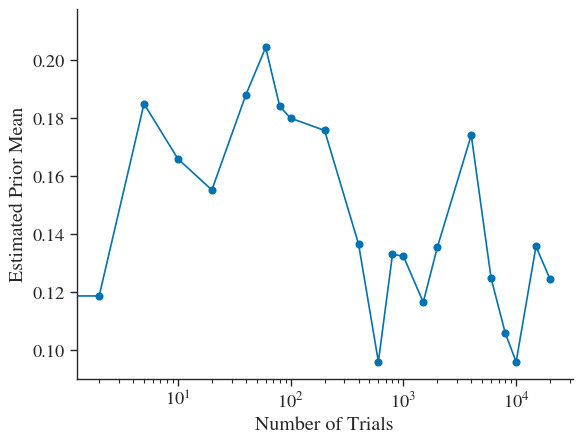

In [8]:
plt.plot(trials, internal_std_list, marker='o')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
#plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(False)
plt.show()

In [9]:
# def mse(mu_list, mu_list_agent):
#     mu_array = np.array(mu_list[:len(mu_list_agent)])  # match lengths
#     agent_array = np.array(mu_list_agent)
#     return np.mean((mu_array - agent_array) ** 2)

# def simulate_agent(mu_final, sigma_final, mu_init, sigma_init, internal_std, measurement_noise):
#     agent = BayesianReplica(mu_init, sigma_init, internal_std)
#     mu_list_agent = []
    
#     for n_trials in trials:
#         mu_prior, sigma_prior = agent.get_prior()
#         mu_list_agent.append(mu_prior)
#         agent.reset_agent()
#         agent.train_agent_kalmann_m_noise_z_var(n_trials, mu_final, sigma_final, measurement_noise)
    
#     return mu_list_agent

# from scipy.optimize import minimize_scalar

# def objective(noise):
    
#     mse_total = 0
#     for _ in range(10):
#         mu_list_agent = simulate_agent(0.48, 0.87, 2.89, 1.136, 0.15, noise)
#         mse_value = mse(mu_list, mu_list_agent)
#         mse_total += mse_value
#     mse_avg = mse_total / 10
#     return mse_avg

# res = minimize_scalar(objective, bounds=(0.1, 10.0), method='bounded')
# best_noise = res.x
# print("Best measurement noise:", best_noise)


In [10]:
# def estimate_noise():
#     res = minimize_scalar(
#         objective,
#         bounds=(1.0, 3.0),
#         method='bounded'
#     )
#     return res.x

# n_boot = 100         # 200–500 is usually enough
# noise_boot = np.zeros(n_boot)

# for b in range(n_boot):
#     noise_boot[b] = estimate_noise()


# alpha = 0.05

# ci_low = np.percentile(noise_boot, 100 * alpha / 2)
# ci_high = np.percentile(noise_boot, 100 * (1 - alpha / 2))

# print(f"Measurement noise estimate: {best_noise:.4f}")
# print(f"95% bootstrap CI: [{ci_low:.4f}, {ci_high:.4f}]")

Finding the mean after N trials

In [11]:

mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

# Kalman filter fitting
agent = BayesianReplica(mu_init, sigma_init, internal_std)
mu_list_kf_agent = []
sigma_list_kf_agent = []
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_kf_agent.append(mu_prior)
    sigma_list_kf_agent.append(sigma_prior)
    agent.reset_agent()
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    
measurement_noise = 2 #1.96 # Why is this different?

# EKF fitting
agent = BayesianReplica(mu_init, sigma_init, internal_std)
mu_list_ekf_agent = []
sigma_list_ekf_agent = []
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_ekf_agent.append(mu_prior)
    sigma_list_ekf_agent.append(sigma_prior)
    agent.reset_agent()
    # Obtain mean
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    # Retrain and replace variance
    agent.train_agent_EKF_sq_residuals(n_trials, mu_final, sigma_final, measurement_noise)

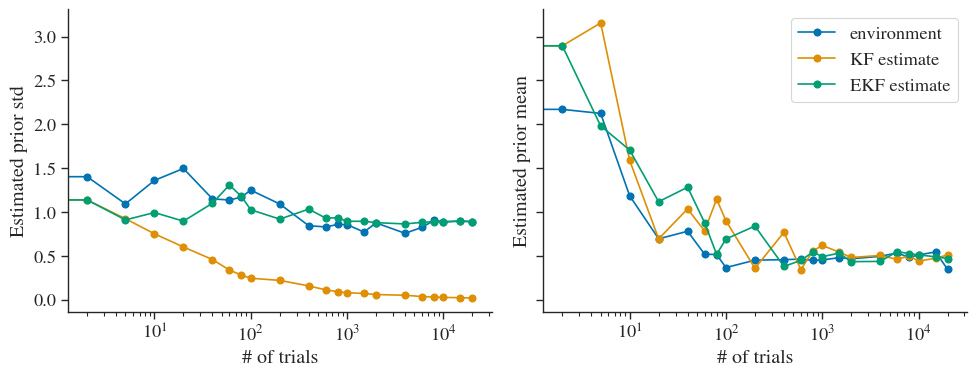

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
axes[0].plot(trials, sigma_list, marker='o', label="environment")
axes[0].plot(trials, sigma_list_kf_agent, marker='o', label="KF estimate")
axes[0].plot(trials, sigma_list_ekf_agent, marker='o', label="EKF estimate")
axes[0].set_xscale('log')
axes[0].set_xlabel('# of trials')
axes[0].set_ylabel('Estimated prior std')
axes[0].grid(False)


axes[1].plot(trials, mu_list, marker='o', label="environment")
axes[1].plot(trials, mu_list_kf_agent, marker='o', label="KF estimate")
axes[1].plot(trials, mu_list_ekf_agent, marker='o', label="EKF estimate")
axes[1].set_xscale('log')
axes[1].set_xlabel('# of trials')
axes[1].set_ylabel('Estimated prior mean')

axes[1].grid(False)
axes[1].legend()

plt.tight_layout()
plt.show()

In [13]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_kalmann = mu_list_agent
sigma_list_kalmann = sigma_list_agent
    


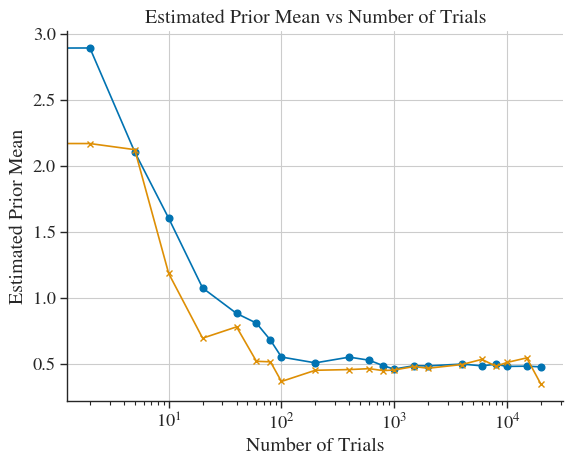

In [14]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

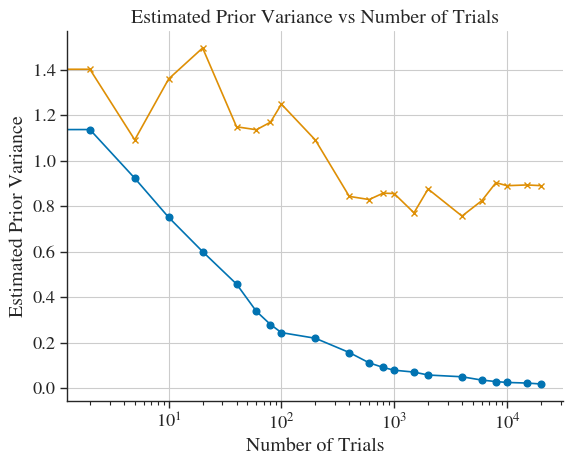

In [15]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [16]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_EKF_sq_residuals(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_EKF_sq_only = mu_list_agent
sigma_list_EKF_sq_only = sigma_list_agent

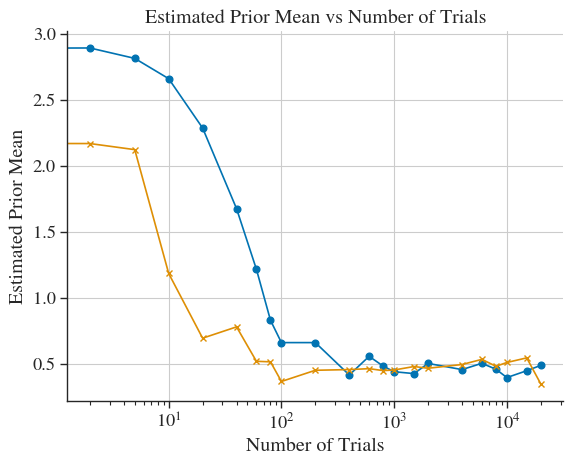

In [17]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

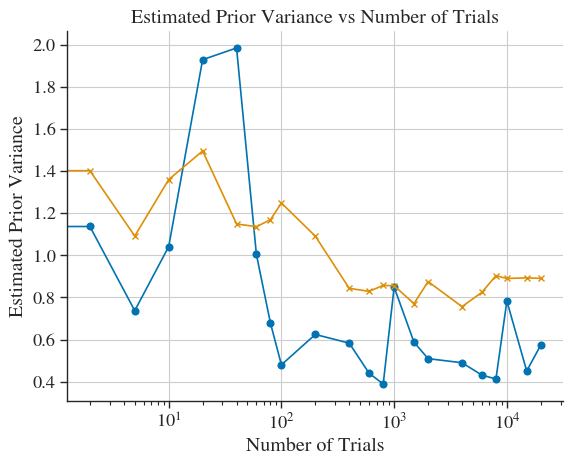

In [18]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [19]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise_pure_mean(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_sq_residuals_pure_var(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_KF_EKF_sq = mu_list_agent
sigma_list_KF_EKF_sq = sigma_list_agent

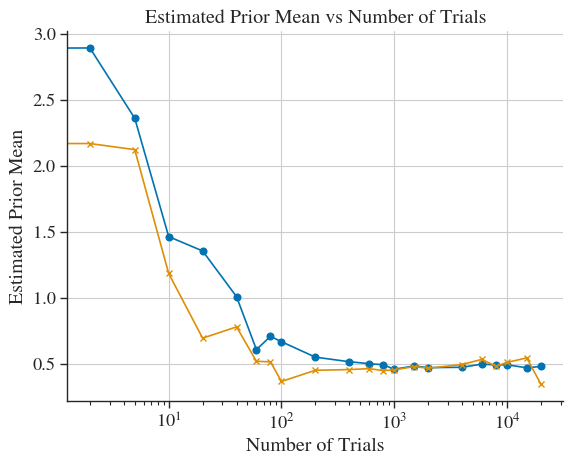

In [20]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

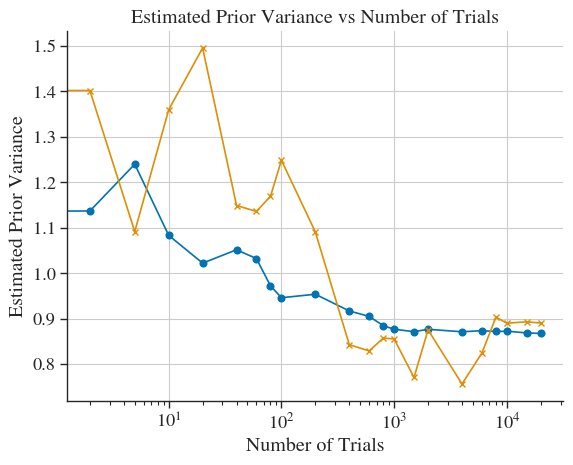

In [21]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [22]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_EKF_absolute(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_EKF_abs_only = mu_list_agent
sigma_list_EKF_abs_only = sigma_list_agent

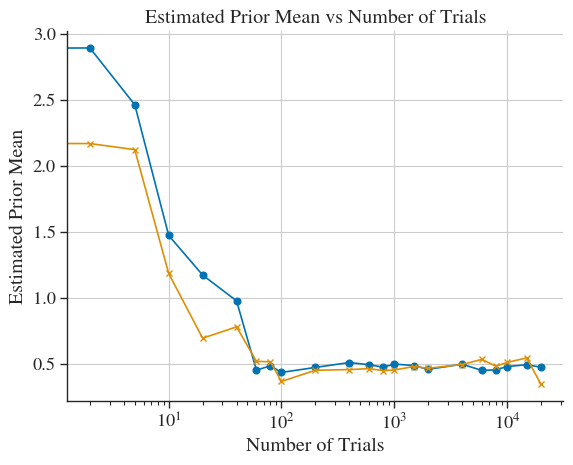

In [23]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

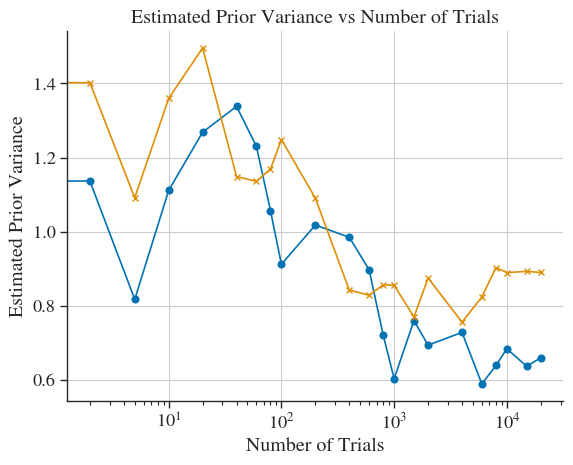

In [24]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [25]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise_pure_mean(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_absolute_pure_var(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_KF_EKF_abs = mu_list_agent
sigma_list_KF_EKF_abs = sigma_list_agent

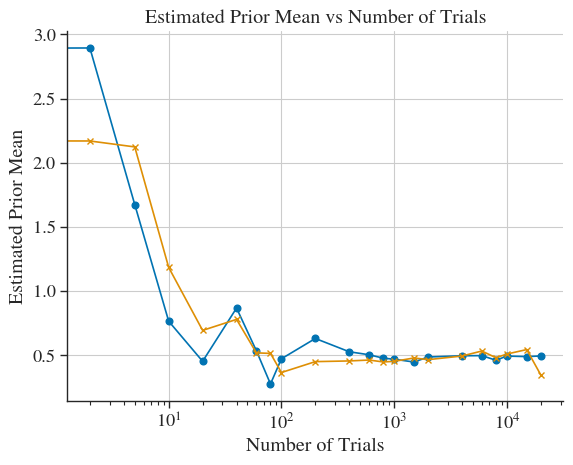

In [26]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

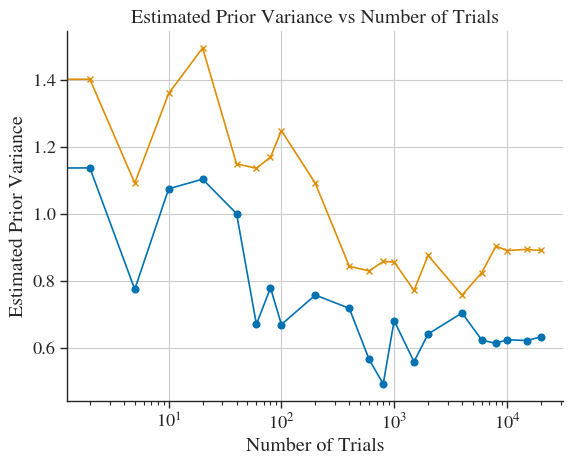

In [27]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

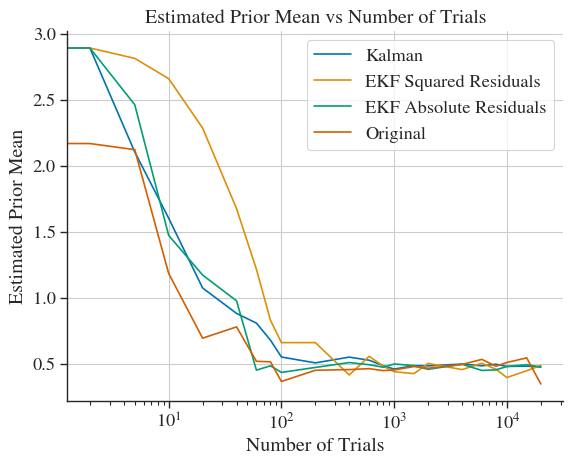

In [28]:
plt.plot(trials, mu_list_kalmann, label='Kalman')
plt.plot(trials, mu_list_EKF_sq_only, label='EKF Squared Residuals')
plt.plot(trials, mu_list_EKF_abs_only, label='EKF Absolute Residuals')
plt.plot(trials, mu_list, label='Original')
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

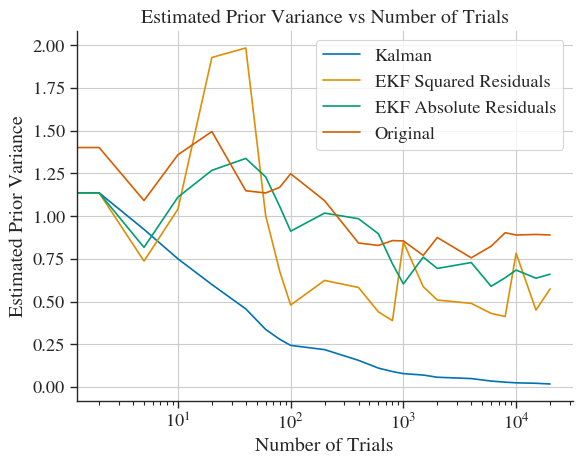

In [29]:
plt.plot(trials, sigma_list_kalmann, label='Kalman')
plt.plot(trials, sigma_list_EKF_sq_only, label='EKF Squared Residuals')
plt.plot(trials, sigma_list_EKF_abs_only, label='EKF Absolute Residuals')
plt.plot(trials, sigma_list, label='Original')
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

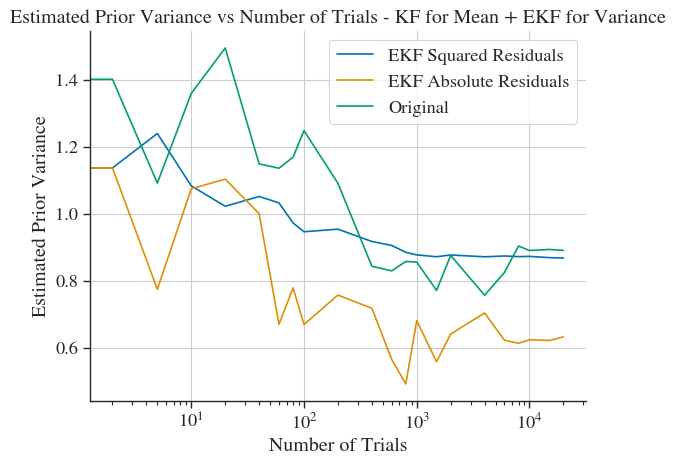

In [30]:
plt.plot(trials, sigma_list_KF_EKF_sq, label='EKF Squared Residuals')
plt.plot(trials, sigma_list_KF_EKF_abs, label='EKF Absolute Residuals')
plt.plot(trials, sigma_list, label='Original')
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials - KF for Mean + EKF for Variance')
plt.grid(True)
plt.show()

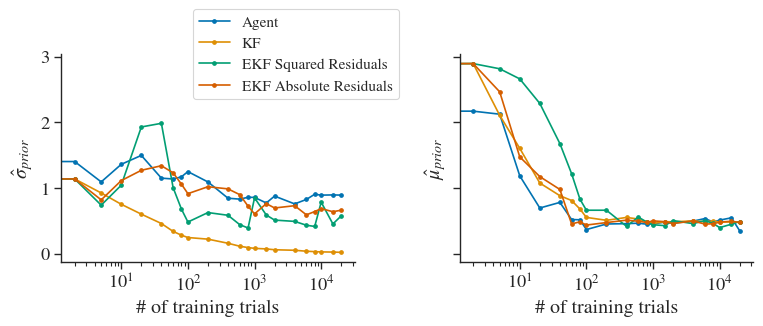

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)
    
axes[0].plot(trials, sigma_list, marker='.', label="Agent")
axes[0].plot(trials, sigma_list_kalmann, marker='.', label="KF")
axes[0].plot(trials, sigma_list_EKF_sq_only, marker='.', label="EKF Squared Residuals")
axes[0].plot(trials, sigma_list_EKF_abs_only, marker='.', label="EKF Absolute Residuals")
axes[0].set_xscale('log')
axes[0].set_xlabel('# of training trials')
axes[0].set_ylabel('$\hat{\sigma}_{prior}$')
axes[0].grid(False)


axes[1].plot(trials, mu_list, marker='.', label="Agent")
axes[1].plot(trials, mu_list_kalmann, marker='.', label="KF estimate")
axes[1].plot(trials, mu_list_EKF_sq_only, marker='.', label="EKF Squared Residuals")
axes[1].plot(trials, mu_list_EKF_abs_only, marker='.', label="EKF Absolute Residuals")

axes[1].set_xscale('log')
axes[1].set_xlabel('# of training trials')
axes[1].set_ylabel('$\hat{\mu}_{prior}$')

axes[1].grid(False)
axes[0].legend(
    fontsize=11,
    loc='center',          # anchor point of legend
    bbox_to_anchor=(.8, 1), # move it left of the axis
    #frameon=False                # optional: cleaner look

)

plt.tight_layout()
plt.savefig("estimate_fitting_kf_ekf.svg", format="svg")
plt.show()

In [32]:
def mse_confidence_interval(x, y, n_bootstrap=2000, alpha=0.05):
    x = np.asarray(x)
    y = np.asarray(y)
    T = min(len(x), len(y))
    x = x[:T]
    y = y[:T]

    residuals = (x - y) ** 2
    boot_mse = []

    for _ in range(n_bootstrap):
        idx = np.random.choice(T, T, replace=True)
        boot_mse.append(np.mean(residuals[idx]))

    lower = np.percentile(boot_mse, 100 * alpha / 2)
    upper = np.percentile(boot_mse, 100 * (1 - alpha / 2))

    return np.mean(residuals), (lower, upper)


In [33]:
def compare_lists(original, list_dict):
    """
    list_dict: {name: time_series}
    """
    results = {}

    for name, series in list_dict.items():
        mse_val, ci = mse_confidence_interval(original, series)
        results[name] = {
            "mse": mse_val,
            "ci_lower": ci[0],
            "ci_upper": ci[1]
        }

    return results


In [34]:
mu_dict = {
    "Kalman": mu_list_kalmann,
    "EKF Squared Residuals": mu_list_EKF_sq_only,
    "EKF Absolute Residuals": mu_list_EKF_abs_only
}

sigma_dict = {
    "Kalman": sigma_list_kalmann,
    "EKF Squared Residuals - KF Mean": sigma_list_KF_EKF_sq,
    "EKF Absolute Residuals - KF Mean": sigma_list_KF_EKF_abs,
    "EKF Squared Residuals": sigma_list_EKF_sq_only,
    "EKF Absolute Residuals": sigma_list_EKF_abs_only
}

results_mu = compare_lists(mu_list, mu_dict)
results_sigma = compare_lists(sigma_list, sigma_dict)

print("Mean Estimation Results:")
for name, res in results_mu.items():
    print(f"{name}: MSE = {res['mse']:.6f}, 95% CI = [{res['ci_lower']:.6f}, {res['ci_upper']:.6f}]")

print("\nVariance Estimation Results:")
for name, res in results_sigma.items():
    print(f"{name}: MSE = {res['mse']:.6f}, 95% CI = [{res['ci_lower']:.6f}, {res['ci_upper']:.6f}]")

Mean Estimation Results:
Kalman: MSE = 0.259103, 95% CI = [0.017070, 0.701373]
EKF Squared Residuals: MSE = 0.547949, 95% CI = [0.144818, 1.101344]
EKF Absolute Residuals: MSE = 0.259080, 95% CI = [0.017385, 0.689500]

Variance Estimation Results:
Kalman: MSE = 0.611555, 95% CI = [0.508521, 0.709104]
EKF Squared Residuals - KF Mean: MSE = 0.030114, 95% CI = [0.012877, 0.054237]
EKF Absolute Residuals - KF Mean: MSE = 0.096746, 95% CI = [0.068355, 0.129986]
EKF Squared Residuals: MSE = 0.171899, 95% CI = [0.107447, 0.250619]
EKF Absolute Residuals: MSE = 0.048389, 95% CI = [0.030922, 0.067973]
